# BEE 4750 Homework 2: Systems Modeling and Simulation

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 09/19/24, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to derive a model for water quality in a river
    system and use this model to check for regulatory compliance.
-   Problem 2 asks you to explore the dynamics and equilibrium stability
    of the shallow lake model under a particular set of parameter
    values.
-   Problem 3 (5750 only) asks you to modify the lake eutrophication
    example from Lecture 04 to account for atmospheric deposition.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [2]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\aliap\Cornell\BEE 4750\hw2-trent-ali-FINAL`


In [3]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Roots

## Problems (Total: 50/60 Points)

### Problem 1 (25 points)

A river which flows at 10 km/d is receiving discharges of wastewater
contaminated with CRUD from two sources which are 15 km apart, as shown
in the Figure below. CRUD decays exponentially in the river at a rate of
0.36 $\mathrm{d}^{-1}$.

<figure>
<img src="attachment:figures/river_diagram.png"
alt="Schematic of the river system in Problem 1" />
<figcaption aria-hidden="true">Schematic of the river system in Problem
1</figcaption>
</figure>

**In this problem**:

-   Assuming steady-state conditions, derive a model for the
    concentration of CRUD downriver by solving the appropriate
    differential equation(s) analytically.
-   Determine if the system in compliance with a regulatory limit of 2.5
    kg/(1000 m$^3$).

The maximum concentration of CRUD in the river falls below the regulatory limit of 20kg/1000m^3

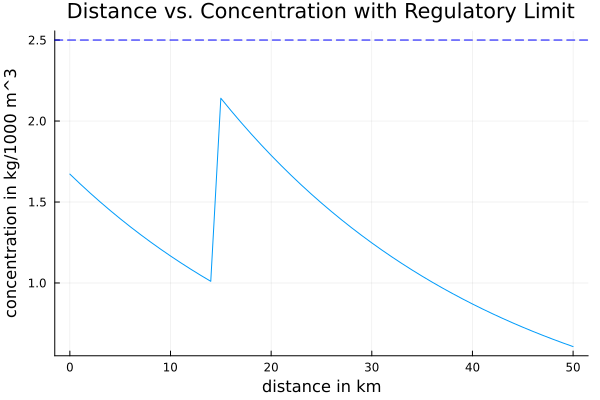

In [2]:
function conc_CRUD(d)
    if d<15
        c=1.6724*exp(-0.36*(d/10)) #concentration for distances less than 15km
    else
        c=(250*1.6724*exp(-0.36*(d/10))+420*exp(-0.36*((d-15)/10)))/310 #concentration more than 15km
    end
    return c
end

distances=0:1:50
concentrations=[conc_CRUD(d) for d in distances]
if maximum(concentrations)<2.5
    print("The maximum concentration of CRUD in the river falls below the regulatory limit of 20kg/1000m^3")
else
    print("The maximum concentration of CRUD in the river is above the regulatory limit of 20kg/1000m^3, see graph for more details")
end


plot(distances, concentrations, xlabel="distance in km", ylabel="concentration in kg/1000 m^3", title = "Distance vs. Concentration with Regulatory Limit", legend=false)
     hline!([2.5], linestyle= :dash, color=:blue, label = "Regulatory Limit of CRUD (20kg/1000m^3)")


____________________explanation____________________________


For this question, I realized that I could seperate the distance input into two situations: before and after 15km. Before 15km, the only input of CRUD could be the first input, but after 15 km, the concentration would be both. 

As a result, the d<15 is relatively simple because it is just one input, one decay. So for this, I used the following equation, with C1 stqanding for the concentration from input 1:
C1=((Qr*Cr)+(Qcrud1*Ccrud1))/(Qr+Qcrud1), to determine what the concetration would be without any decay, then I would multiply this consstant with e^((k*d)/10)

For values: 
Qr, the flow rate of the river, is given as 250,000 m^3/d
Cr, the concentration of Crud in the river, is 0.5 kg/(1000m^3)
Qcrud1, or the flow rate of the first crud input, is 40,000 m^3/d
Ccrud1, or the concentration of teh first Crud input, is 9 kg/(1000 m^3)

Plugging these numbers in: 
 c=1.6724*exp(-0.36*(d/10)) is the equation for when d<15


For d>15, the situation has two inputs, and two decay terms that are seperated. 

The first part of the equation is the contribution input 1 has to the concentration, so it looks familiar: Qr*C1*e^((k*d)/10)
The second part is adding this concentration to the contribution from input 2: 
C2=(Qcrud2*Ccrud2)/(Qr+Qcrud2)
where c2 is the value of CRUD without degradation, 
Qcrud2 being the flow rate of crud input 2, or 60,000 m^3/d
Ccrud2, the concentration of crud in input 2, or 7kg/1000 m^3
and k being -0.36.
Then I have to add the degredation term, which is very similar to that of c1, but i have to put the position in context of the inpur 2 being 15m downstream:
exp(-0.36*((d-15)/10))
Thus: c2=1.355*exp(-0.36*((d-15)/10))

____________________explanation____________________________

> **Tip**
>
> Formulate your model in terms of distance downriver, rather than
> leaving it in terms of time from discharge.

### Problem 2 (25 points)

Consider the shallow lake model from class:

$$
\begin{aligned}
X_{t+1} &= X_t + a_t + y_t + \frac{X_t^q}{1 + X_t^q} - bX_t, \\
y_t &\sim \text{LogNormal}(\mu, \sigma^2),
\end{aligned}
$$

where:

-   $X_t$ is the lake phosphorous (P) concentration at time $t$;
-   $a_t$ is the point-source P release at time $t$;
-   $y_t$ is the non-point-source P release at time $t$, which is
    treated as random from a LogNormal distribution with mean $\mu$ and
    standard deviation $\sigma$;
-   $b$ is the linear rate of P outflow;
-   $q$ is a parameter influencing the rate of P recycling from the
    sediment.

**In this problem**:

-   Make an initial conditions plot for the model dynamics for $b=0.5$,
    $q=1.5$, $y_t=0$, and $a_t=0$ for $t=0, \ldots, 30$. What are the
    equilibria? What can you say about the resilience of the system?

    > **Finding equilibria**
    >
    > Use [`Roots.jl`](https://juliamath.github.io/Roots.jl/stable/) to
    > find the equilibria by solving for values where $X_{t+1} = X_t$.
    > For example, if you have functions `X_outflow(X,b)` and
    > `X_recycling(X,q)`, you could create a function
    > `X_delta(x, a) = a + X_recycling(x) - X_outflow(x)` and call
    > `Roots.find_zero(x -> X_delta(x, a), x₀)`, where `x₀` is an
    > initial value for the search (you might need to use your plot to
    > find values for `x₀` near each of the “true” equilibria).

-   Repeat the analysis with $a_t=0.02$ for all $t$. What are the new
    equilibria? How have the dynamics and resilience of the system
    changed?

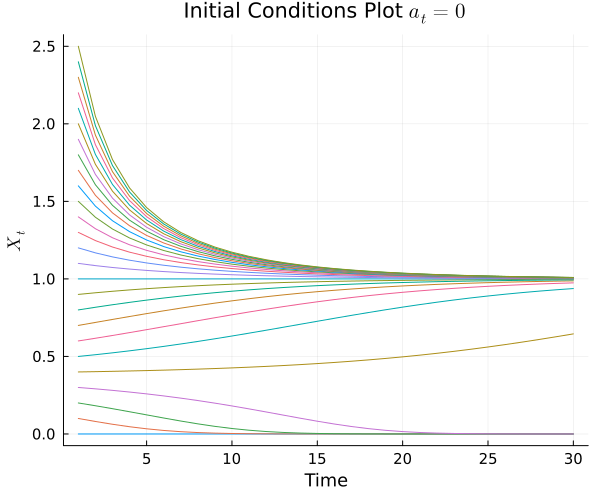

In [8]:
# Define functions for lake recycling and outflows (Class Slides)
lake_cycling(x, q) = x.^q ./ (1 .+ x.^q);
lake_outflow(x, b) = b .* x;

T = 30
X_vals = collect(0.0:0.1:2.5)
function simulate_lake(X_ic, T, b, q, a, y)
    X = zeros(T)
    X[1] = X_ic
    for t = 2:T
        X[t] = X[t-1] .+ a[t] .+ y[t].+ lake_cycling(X[t-1], q) .- lake_outflow(X[t-1], b)
    end
    return X
end

lake_delta(x, b, q, a) = a + lake_cycling(x,q) - lake_outflow(x,b)

# Make an initial conditions plot for the model dynamics for b=0.5, q=1.5, y_t=0, and a_t=0 for t: 0-30.
X = map(x -> simulate_lake(x, T, 0.5, 1.5, zeros(T), zeros(T)), X_vals)
p_noinflow = plot(X, label=false, ylabel=L"X_t", xlabel="Time", guidefontsize=12, tickfontsize=10, size=(600, 500), title = L"Initial Conditions Plot $a_t=0$")

I defined lake cycling and outflow parameters according to the provided formula. In a master formula incorporating the first two, I iteratively marched through the numerical model for $T = 2-30$, generating a curve for a given $X$ value intial condition (at $T=1$). This master function, simulate_lake, was mapped to initial condition values from 0-2.5 with 0.1 precision. Below, roots (equilibria) are found for the $X_i = X_{i+1}$ case, as instructed.

In [12]:
# Find equilibria for the model dynamics for b=0.5, q=1.5, y_t=0, and a_t=0 for t: 0-30.
    a = Roots.find_zero(x -> lake_delta(x,0.5,1.5,0), 1)
    b = Roots.find_zero(x -> lake_delta(x,0.5,1.5,0), 0.5)
    c =Roots.find_zero(x -> lake_delta(x,0.5,1.5,0), 0)
    @show (a,b,c)

(1.0, 0.3819660112501051, 0.0)

(a, b, c) = (1.0, 0.3819660112501051, 0.0)


The equilibria for the given conditions (a = 0) are located at 1 and 0 (stable) and 0.382 (unstable).
The system is especially resillient above 1.0 and a little below it. Towards around 0.5 stability decreases until an unstable equilibrium is reached. The subsequent stable equilibrium at 0.0 is less resilient than the one at 1.0.

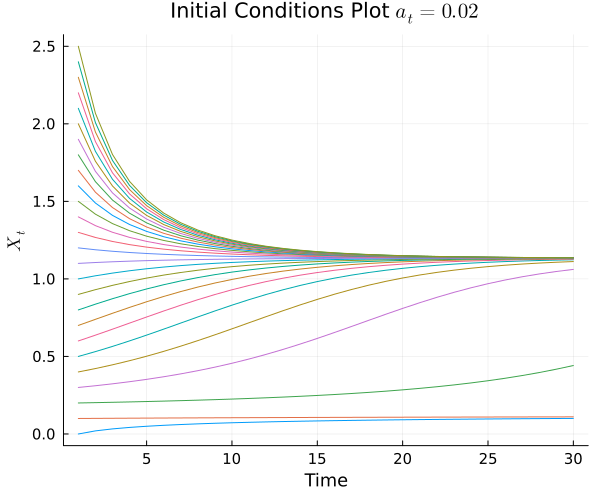

In [9]:
# Make an initial conditions plot for the model dynamics for b=0.5, q=1.5, y_t=0, and a_t=0.02 for t: 0-30.
X = map(x -> simulate_lake(x, T, 0.5, 1.5, 0.02*ones(T), zeros(T)), X_vals)
p_noinflow = plot(X, label=false, ylabel=L"X_t", xlabel="Time", guidefontsize=12, tickfontsize=10, size=(600, 500), title = L"Initial Conditions Plot $a_t=0.02$")

In [10]:

# Find equilibria for the model dynamics for b=0.5, q=1.5, y_t=0, and a_t=0.02 for t: 0-30.
a = Roots.find_zero(x -> lake_delta(x,0.5,1.5,0.02), 1)
b =Roots.find_zero(x -> lake_delta(x,0.5,1.5,0.02), 0.5)
c =Roots.find_zero(x -> lake_delta(x,0.5,1.5,0.02), 0)
@show (a,b,c)

(1.1341008852434813, 0.15442860418310417, 0.1162444196607475)

(a, b, c) = (1.1341008852434813, 0.15442860418310417, 0.1162444196607475)


The equilibria for the given conditions (a = 0.02) are located at 1.134 and 0.116 (stable) and 0.154 (unstable).
The stable equilibrium points increased in magnitude and the unstable one decreased. The system is just as resilient above 1.134 as the previous iteration. Due to the lowering of the unstable equilibrium, this system is arguably more resilient below 1.134 than the a=0 case was below 1.0 (i.e., lines converve to the equilibrium for lower X values). Nevertheless, the second stable equilibrium is ostensibly less resilient.

### Problem 3 (10 points)

**This problem is only required for students in BEE 5750**.

Consider the lake eutrophication example from [Lecture
04](https://viveks.me/environmental-systems-analysis/slides/lecture03-1-eutrophication-modeling.html#/title-slide).
Suppose that phosphorous is also atmospherically deposited onto the lake
surface at a rate of
$1.6 \times 10^{-4} \mathrm{kg/(yr} \cdot \mathrm{m}^2)$, which is then
instantly mixed into the lake. Derive a model for the lake phosphorous
concentration and find the maximum allowable point source phosphorous
loading if the goal is to keep lake concentrations below 0.02 mg/L.

## References

List any external references consulted, including classmates.